### Color Histogram
Extract a color Histogram of a given 2D image.

The color histogram will be extracted for both the RGB and the HSV color coding

![title](Udacican.jpeg)

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Import the Image
Load the image into the notebook, multiple images can be tested

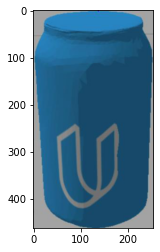

In [29]:
# Read in and plot the image
image = mpimg.imread('Udacican.jpeg')
plt.imshow(image)

### Construct the Histogram
Function that given a generic image in 2D (both RGB or HSV) extracts a color Histogram

In [31]:
def hist(image, nbins, bins_range):
    ### Take histograms in three channels
    ch_1 = np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    ch_2 = np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    ch_3 = np.histogram(image[:,:,2], bins=nbins, range=bins_range)
                        
    ### Concatenate the histograms into a single feature vector
    # Generating bin centers
    bin_edges = ch_1[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
                        
    # Normalize the result
    hist_features = np.concatenate((ch_1[0], ch_2[0], ch_3[0])).astype(np.float64)
    norm_features = hist_features / np.sum(hist_features)
    return norm_features

### Create the Color Histogram
Functions that given an RGB planar image and the numbers of bins and the rage, converts the image from the **rgb** to the **hsv** color coding and then performs the extraction of a Color Histogram

In [35]:
# Define a function to compute color histogram features  
def color_hist(img_rgb, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    
    # Show the RGB and the HSV color spaces
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('RGB Color Space')
    fig.add_subplot(1, 2, 2)
    plt.imshow(img_hsv)
    plt.title('HSV Color Space')

    # Compute the histogram of the HSV channels separately
    norm_features = hist(img_hsv, nbins, bins_range)
    
    # Return the feature vector
    return norm_features

 ### RGB Color Histogram
 Histogram of the RGB image


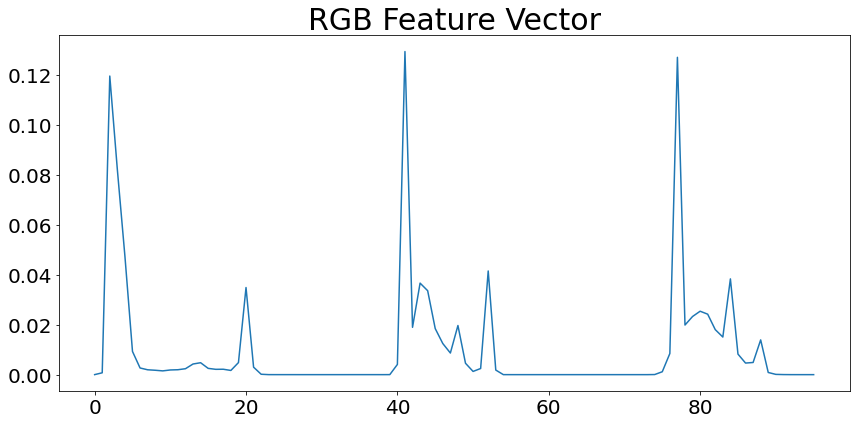

In [36]:
feature_vec = hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('RGB Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print('Your function is returning None...')

### HSV Color Histogram
Histogram of the HSV image

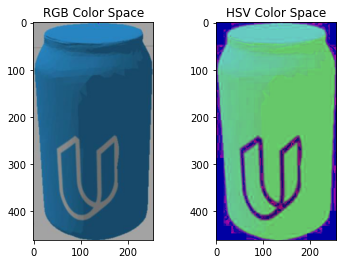

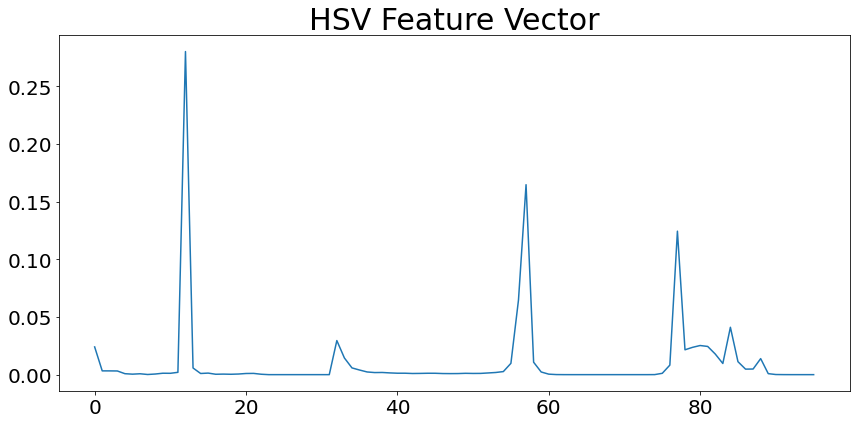

In [37]:
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print('Your function is returning None...')